### Project Title : Predicting whether a customer will default on his/her credit card ¶

### Problem Description 
This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments¶

### Data Description 
### Attribute Information: 
This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:¶

* X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* X2: Gender (1 = male; 2 = female).
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* X4: Marital status (1 = married; 2 = single; 3 = others).
* X5: Age (year).
* X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

#### Objective:
Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by Credit Card Default.

We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [3]:
df = pd.read_csv('data/UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

What we know about dataset :

We have records of 30000 customers. Below are the description of all features we have.

* ID: ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1 = male, 2 = female)

* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

* AGE: Age in years

#### Scale for PAY_0 to PAY_6 : 
(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_0: Repayment status in September, 2005 (scale same as above)

* PAY_2: Repayment status in August, 2005 (scale same as above)
    
* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.

So let's begin.

First we will check if we have any null values

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploratory Data Analysis:

#### Dependent Variables:

In [7]:
#renaming for better convinience
df['IsDefaulter'] = df['default.payment.next.month']
df.drop('default.payment.next.month', axis = 1)
#df.rename({'default.payment.next.month' : 'IsDefaulter'}, inplace = True)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<Axes: xlabel='IsDefaulter', ylabel='count'>

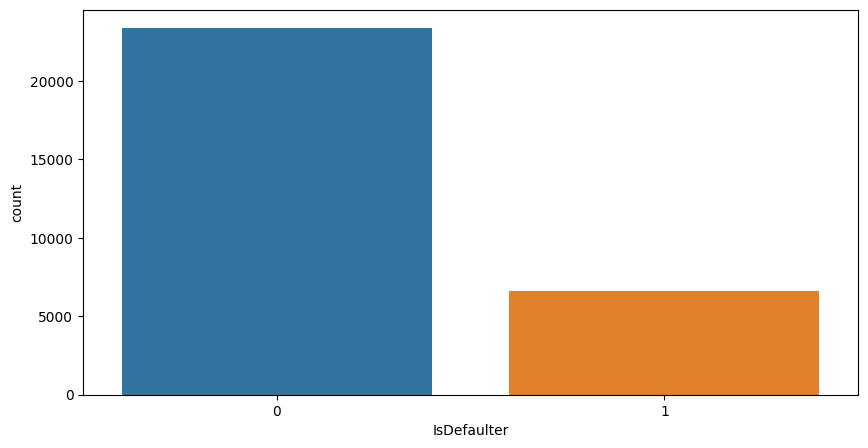

In [8]:
plt.figure(figsize = (10, 5))
sns.countplot(x='IsDefaulter', data = df)

In [9]:
df['IsDefaulter'].value_counts()

IsDefaulter
0    23364
1     6636
Name: count, dtype: int64

As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.

### Independent Variable:
#### Categorical Features
We have few categorical features in our dataset. Let'Check how they are related with out target class.

#### SEX

1 - Male
2 - Female

In [10]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

#### Education

1 = graduate school; 2 = university; 3 = high school; 4 = others

In [11]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [12]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0) 
df.loc[fil, 'EDUCATION'] == 4
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

#### Marriage

1 = married; 2 = single; 3 = others

In [13]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

In [14]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64

#### Plotting our categorical features

In [15]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [16]:
df_cat = df[categorical_features]
df_cat['Defaulter'] = df['IsDefaulter']

In [17]:
df_cat.replace({'SEX': {1: 'MALE', 2: 'FEMALE'}, 'EDUCATION' : {1: 'graduate school', 2: 'university', 3: 'high school',  4: 'others'}, 
               'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}}, inplace = True)

<Figure size 1000x500 with 0 Axes>

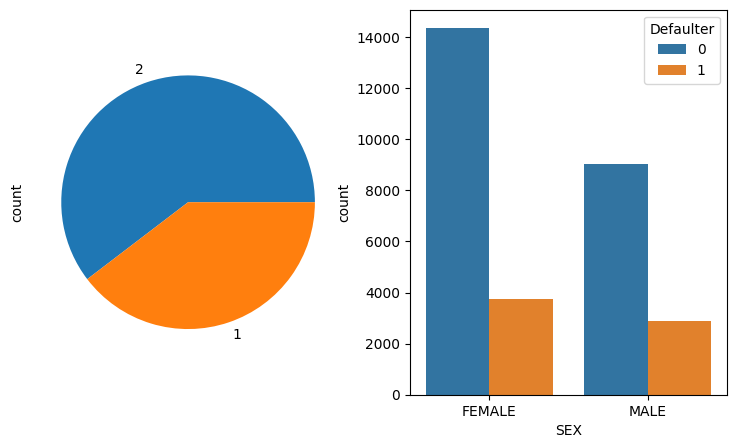

<Figure size 1000x500 with 0 Axes>

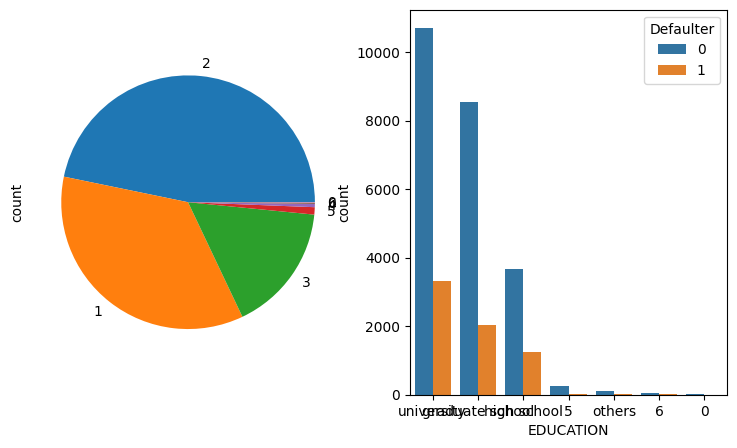

<Figure size 1000x500 with 0 Axes>

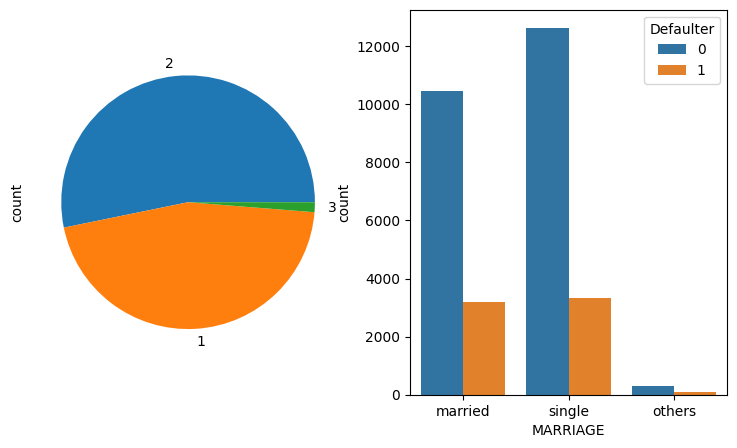

In [18]:
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    fig, axes = plt.subplots(ncols = 2, figsize = (9, 5))
    df[col].value_counts().plot(kind = 'pie', ax = axes[0], subplots = True)
    sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

Below are few observations for categorical features:

* There are more females credit card holder,so no. of defaulter have high proportion of females.
* No. of defaulters have a higher proportion of educated people (graduate school and university)
* No. of defaulters have a higher proportion of Singles.

#### LIMIT Balance:

In [19]:
df['LIMIT_BAL'].max()

1000000.0

In [20]:
df['LIMIT_BAL'].min()

10000.0

In [21]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

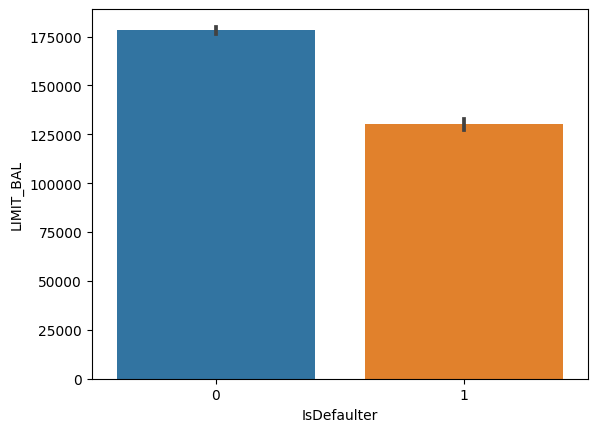

In [22]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

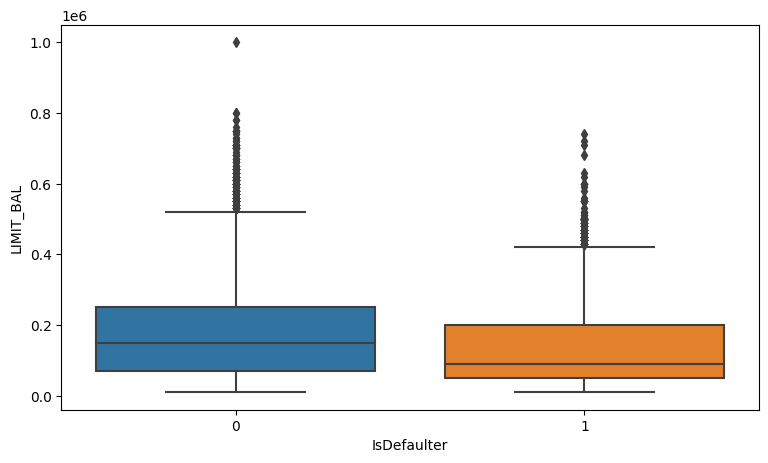

In [23]:
plt.figure(figsize=(9, 5))
ax = sns.boxplot(x='IsDefaulter', y = 'LIMIT_BAL', data = df)

In [24]:
#renaming columns

df.rename(columns = {'PAY_0':'PAY_SEPT', 'PAY_2':'PAY_AUG', 'PAY_3':'PAY_JUL', 'PAY_4':'PAY_JUN', 'PAY_5':'PAY_MAY', 'PAY_6':
                    'PAY_APR'}, inplace = True)
df.rename(columns = {'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JUL', 'BILL_AMT4':'BILL_AMT_JUN',
                    'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns = {'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JUL', 'PAY_AMT4':'PAY_AMT_JUN', 
                    'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APR'}, inplace = True)

In [25]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


#### AGE:
Plotting graph of number of ages of all people with credit card irrespective of gender.

In [26]:
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

In [27]:
df['AGE'] = df['AGE'].astype('int')

In [28]:
df['AGE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 30000 entries, 0 to 29999
Series name: AGE
Non-Null Count  Dtype
--------------  -----
30000 non-null  int32
dtypes: int32(1)
memory usage: 117.3 KB


<Axes: xlabel='count', ylabel='AGE'>

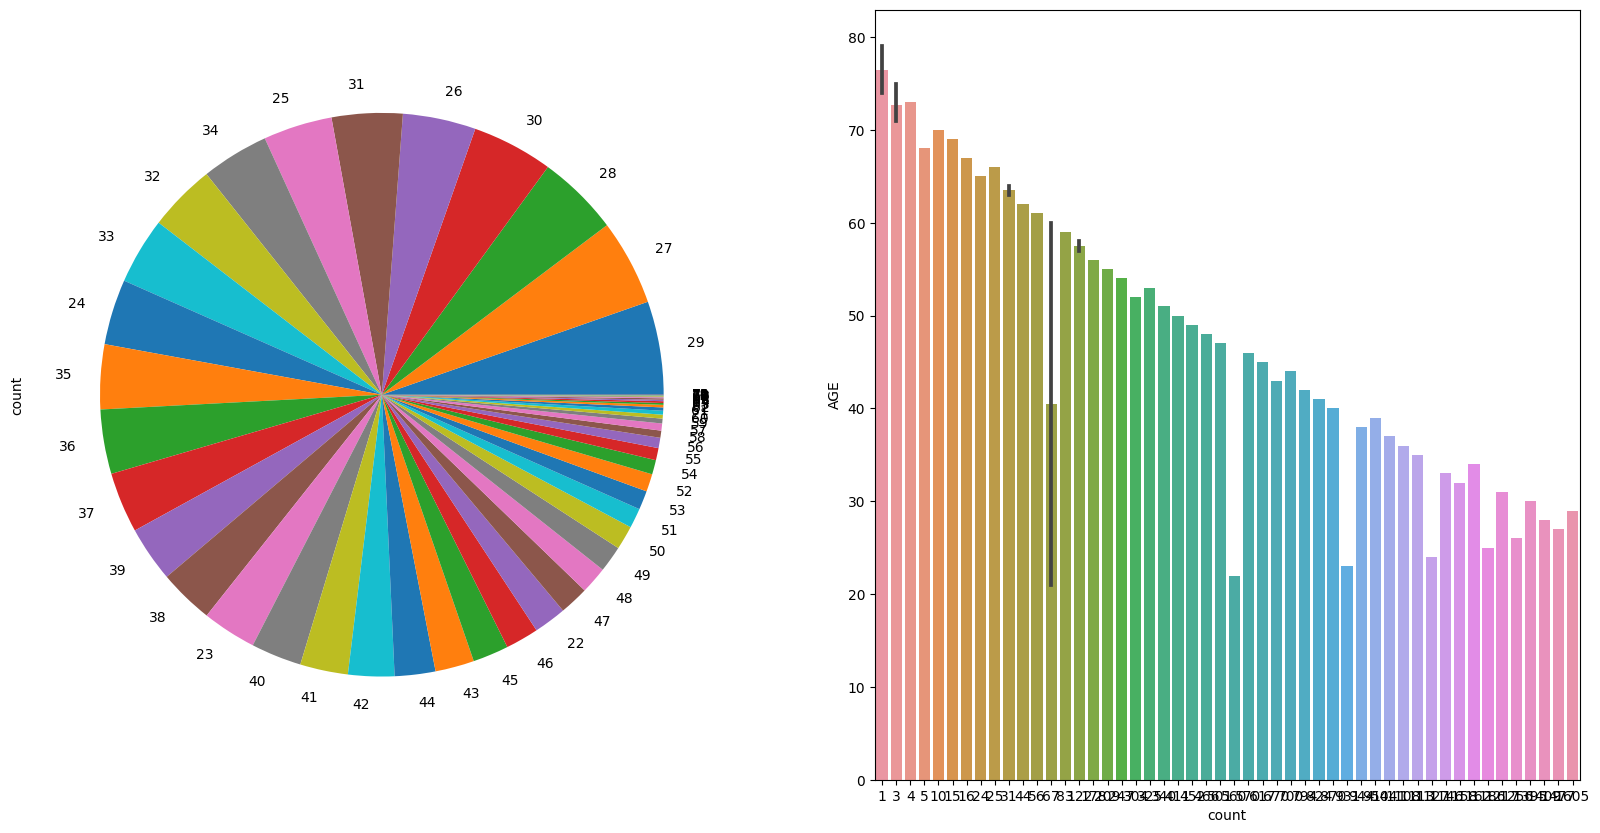

In [29]:
fig, axes = plt.subplots(ncols = 2, figsize=(20,10))
Day_df=df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='count',y='AGE',data=Day_df,ax = axes[1],orient='v')

In [30]:
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [31]:
df = df.astype('int')

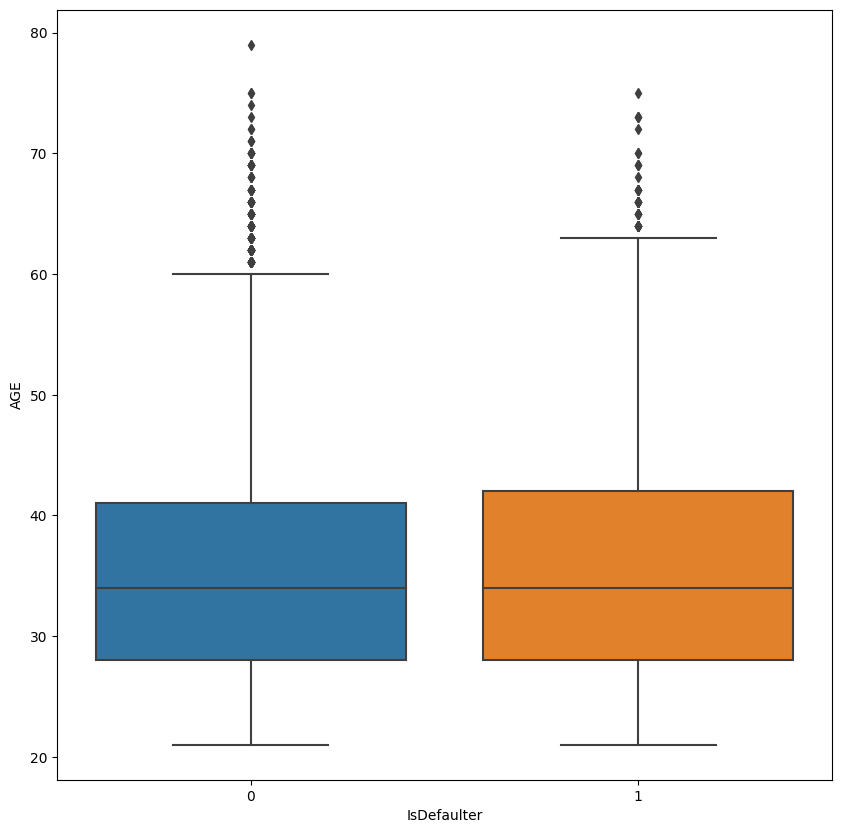

In [32]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='IsDefaulter', y = 'AGE', data = df)

#### Bill Amount

In [33]:
bill_amnt_df = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]

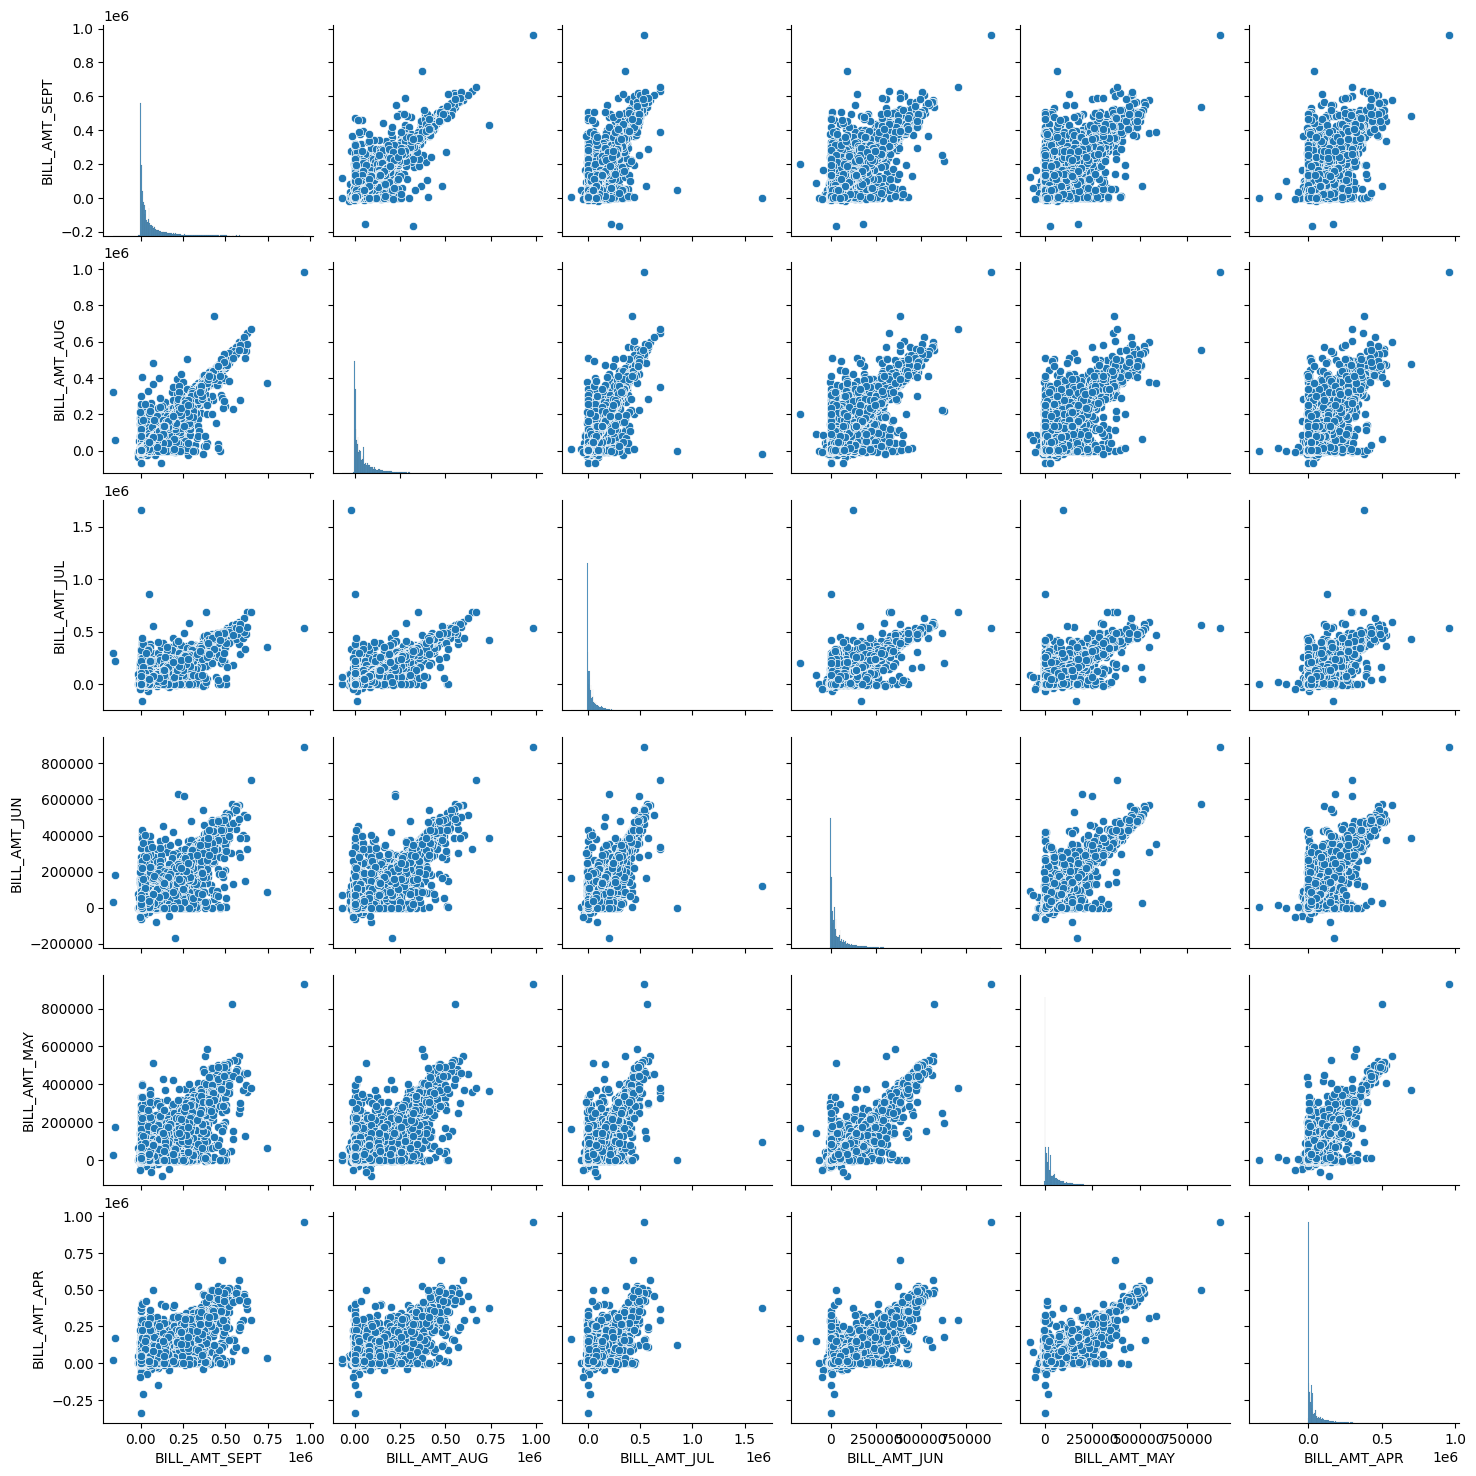

In [34]:
sns.pairplot(data = bill_amnt_df)

#### History Payment Status

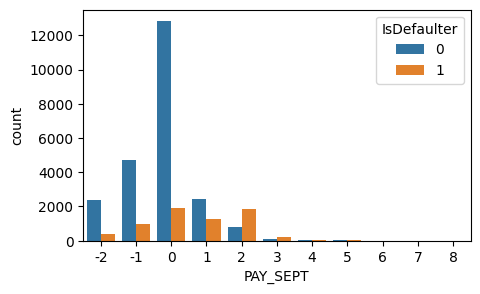

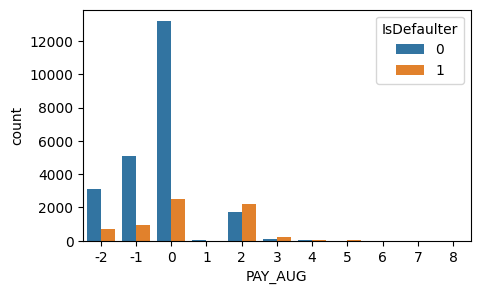

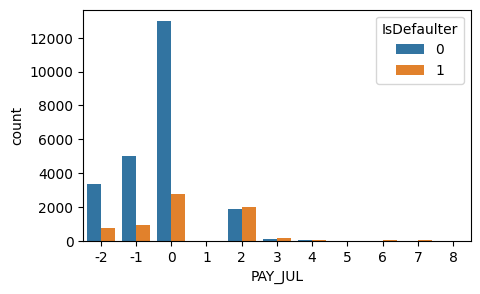

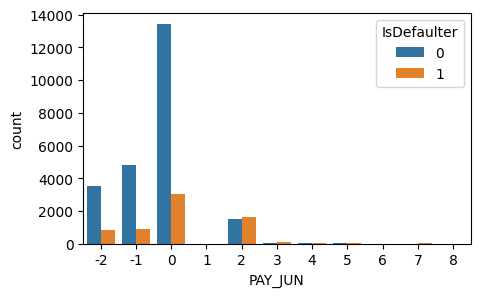

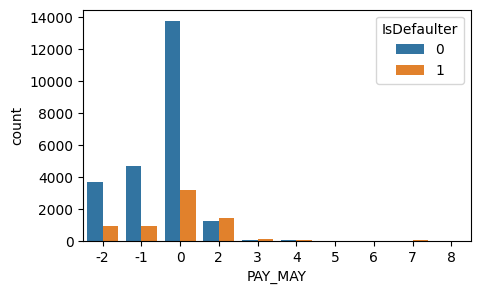

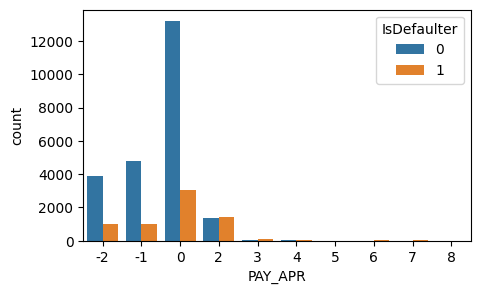

In [35]:
pay_col = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for col in pay_col:
    plt.figure(figsize = (5, 3))
    sns.countplot(x = col, hue = 'IsDefaulter', data = df)

#### Paid Amount

In [36]:
pay_amnt_df = df[['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter']]

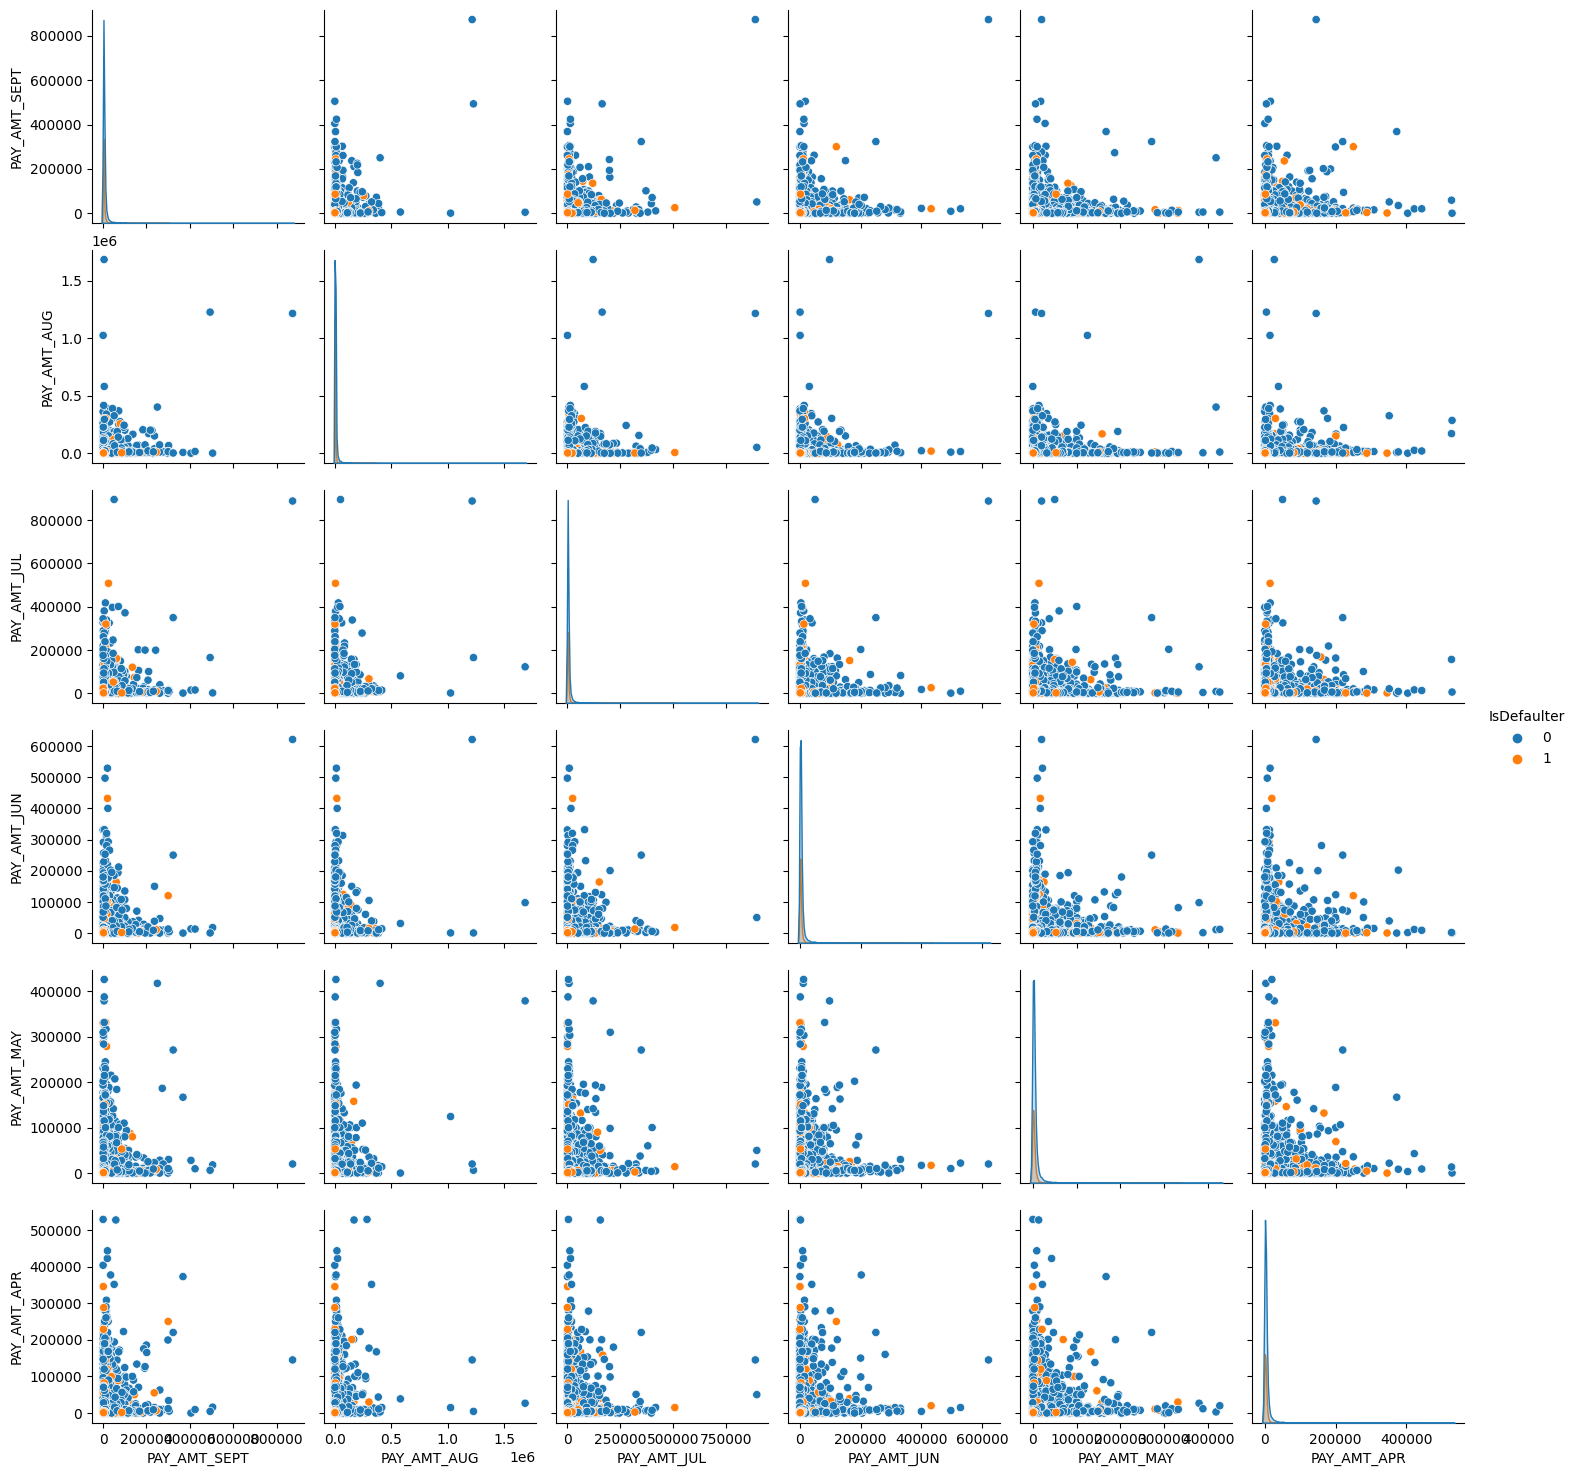

In [37]:
sns.pairplot(data = pay_amnt_df, hue = 'IsDefaulter')

In [38]:
df.shape

(30000, 26)

#### As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:, 0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [40]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,20846,50000,1,2,2,23,2,1,0,0,...,4816,418,846,1775,1607,981,8,428,428,1
46724,6132,160000,2,2,1,42,-1,-1,-1,-1,...,1538,1641,0,2250,4305,1538,1641,0,355,1
46725,17117,80356,1,1,1,30,0,0,0,0,...,52872,28029,27581,2895,2106,28323,2288,1928,2178,1
46726,20030,60000,1,3,1,44,0,-1,-1,-1,...,222,222,222,222,222,222,222,222,222,1


In [41]:
columns = list(df.columns)

In [42]:
columns.pop()

'IsDefaulter'

In [43]:
balance_df = pd.DataFrame(x_smote, columns = columns)

In [44]:
balance_df['IsDefaulter'] = y_smote

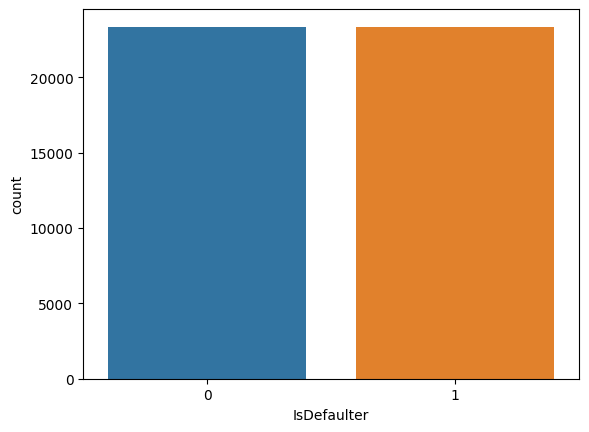

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='IsDefaulter', data=balance_df)
plt.show()

In [46]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
13,14,70000,1,2,2,30,1,2,2,0,...,36137,36894,3200,0,3000,3000,1500,0,1,1
16,17,20000,1,1,2,24,0,0,2,2,...,17905,19104,3200,0,1500,0,1650,0,1,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,632,316,316,316,0,632,316,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,20846,50000,1,2,2,23,2,1,0,0,...,418,846,1775,1607,981,8,428,428,1,1
46724,6132,160000,2,2,1,42,-1,-1,-1,-1,...,1641,0,2250,4305,1538,1641,0,355,1,1
46725,17117,80356,1,1,1,30,0,0,0,0,...,28029,27581,2895,2106,28323,2288,1928,2178,1,1
46726,20030,60000,1,3,1,44,0,-1,-1,-1,...,222,222,222,222,222,222,222,222,1,1


### Feature Engineering

In [47]:
df_fr = balance_df.copy()

In [48]:
df_fr['Payment_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

In [49]:
df_fr.groupby('IsDefaulter')['Payment_Value'].mean()

IsDefaulter
0   -1.980140
1    1.674713
Name: Payment_Value, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='Payment_Value'>

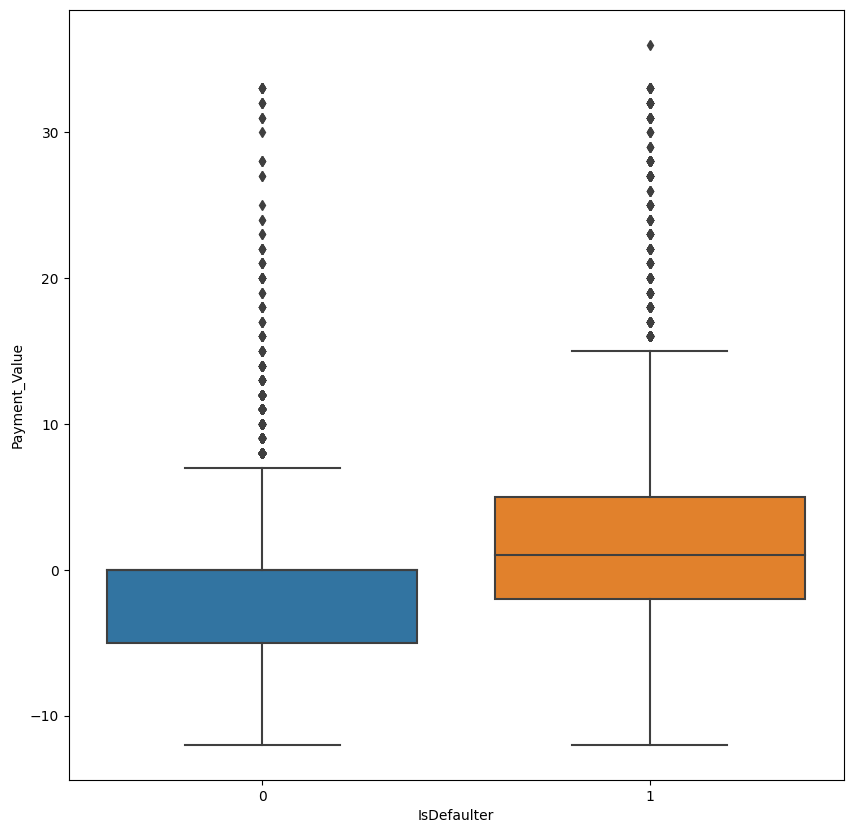

In [50]:
plt.figure(figsize=(10, 10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payment_Value')

In [51]:
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [52]:
df_fr.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    195809.869800
Name: Dues, dtype: float64

In [53]:
df_fr['EDUCATION'].mean()

1.7674841636706045

In [54]:
df_fr['EDUCATION'] = np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION'] = np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [55]:
df_fr['MARRIAGE'].unique()

array([1, 2, 3])

In [56]:
df_fr['MARRIAGE'] = np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [57]:
df_fr.replace({'SEX': {1: 'MALE', 2: 'FEMALE'}, 'EDUCATION': {1: 'graduate School', 2: 'University', 3: 'high school', 4: 'others'}, 
               'MARRIAGE': {1: 'married', 2: 'single', 3: 'others'}}, inplace = True)

In [58]:
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,IsDefaulter,Payment_Value,Dues
0,1,20000,FEMALE,University,married,24,2,2,-1,-1,...,0,689,0,0,0,0,1,1,-2,3913
1,2,120000,FEMALE,University,single,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,1,3,10352
2,3,90000,FEMALE,University,single,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,0,0,76608
3,4,50000,FEMALE,University,married,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,0,0,174713
4,5,50000,MALE,University,married,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,0,-2,44620


### One Hot Encoding

In [59]:
df_fr = pd.get_dummies(df_fr, columns = ['EDUCATION', 'MARRIAGE'])

In [60]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,Payment_Value,Dues,EDUCATION_5,EDUCATION_University,EDUCATION_graduate School,EDUCATION_high school,EDUCATION_others,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,-2,3913,False,True,False,False,False,True,False,False
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,3,10352,False,True,False,False,False,False,False,True
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,76608,False,True,False,False,False,False,False,True
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,174713,False,True,False,False,False,True,False,False
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,-2,44620,False,True,False,False,False,True,False,False


In [61]:
df_fr.drop(['EDUCATION_others', 'MARRIAGE_others'], axis = 1, inplace = True)

In [62]:
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True)

In [63]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [64]:
#Label Encoding for Gender
encoders_nums = {'SEX':{'FEMALE': 0, 'MALE': 1}}
df_fr = df_fr.replace(encoders_nums)

In [65]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [66]:
df_fr.drop('ID', axis = 1, inplace = True)

In [67]:
df_fr.to_csv('Final_df.csv')

In [68]:
df_fr = pd.read_csv('./Final_df.csv')

In [69]:
df_fr = pd.read_csv('./Final_df.csv')

In [70]:
df_fr.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,0,20000,0,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,120000,0,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,2,90000,0,34,29239,14027,13559,14331,14948,15549,...,False,True,False,False,False,False,False,False,False,False
3,3,50000,0,37,46990,48233,49291,28314,28959,29547,...,False,True,False,False,False,False,False,False,False,False
4,4,50000,1,57,8617,5670,35835,20940,19146,19131,...,False,True,False,False,False,False,False,False,False,False


In [71]:
df_fr.drop(['Unnamed: 0'], axis = 1, inplace = True)

### Implementing Logistic Regression

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [72]:
df_log_reg = df_fr.copy()

In [73]:
df_log_reg.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,False,False,False,True,False,False,False,False,False,False
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,False
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,False
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,False


In [74]:
X = df_log_reg.drop(['IsDefaulter', 'Payment_Value', 'Dues'], axis = 1)
y = df_log_reg['IsDefaulter']

In [75]:
columns = X.columns

In [76]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [78]:
param_grid = {'penalty':['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [79]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [80]:
optimized_clf = grid_lr_clf.best_estimator_

In [81]:
grid_lr_clf.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [82]:
grid_lr_clf.best_score_

1.0

In [83]:
#Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:, 1]
test_preds = optimized_clf.predict_proba(X_test)[:, 1]

In [84]:
#Get the predicted Classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [85]:
#Get the accuracy Scores
train_accuracy_lr = accuracy_score(train_class_preds, y_train)
test_accuracy_lr = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [86]:
test_accuracy_lr = accuracy_score(test_class_preds, y_test)
test_precision_score_lr = precision_score(test_class_preds, y_test)
test_recall_score_lr = recall_score(test_class_preds, y_test)
test_f1_score_lr = f1_score(test_class_preds, y_test)
test_roc_score_lr = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is: ", test_accuracy_lr)
print("The precision on test data is: ", test_precision_score_lr)
print("The recall on test data is: ", test_recall_score_lr)
print("The f1 on test data is: ", test_f1_score_lr)
print("The roc_score on test data is: ", test_roc_score_lr)

The accuracy on test data is:  1.0
The precision on test data is:  1.0
The recall on test data is:  1.0
The f1 on test data is:  1.0
The roc_score on test data is:  1.0


[[15653     0]
 [    0 15654]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

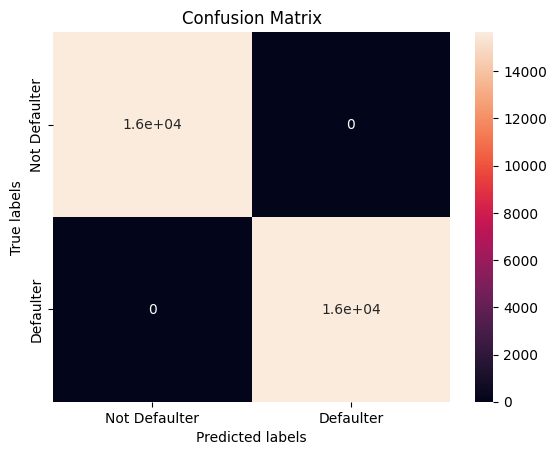

In [87]:
#Get the confusion matrix for both train and test
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot = True, ax=ax) #annot = True to annotate cells

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [88]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [89]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)[:10]

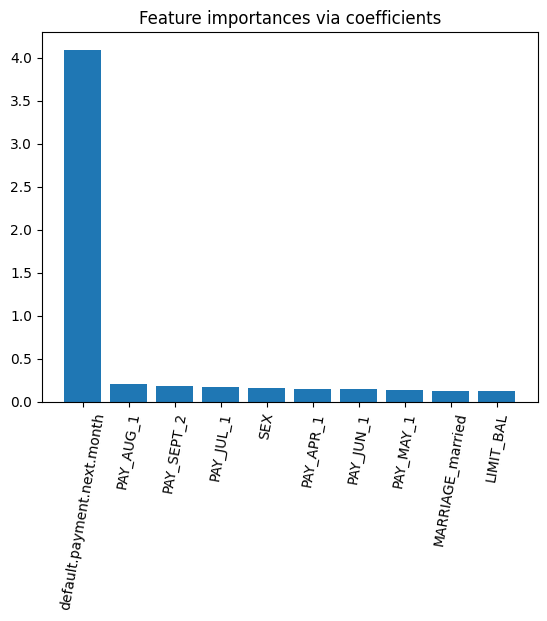

In [90]:
plt.bar(height = feature_importance['Importance'], x = feature_importance['Features'])
plt.xticks(rotation = 80)
plt.title('Feature importances via coefficients')
plt.show()

In [91]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

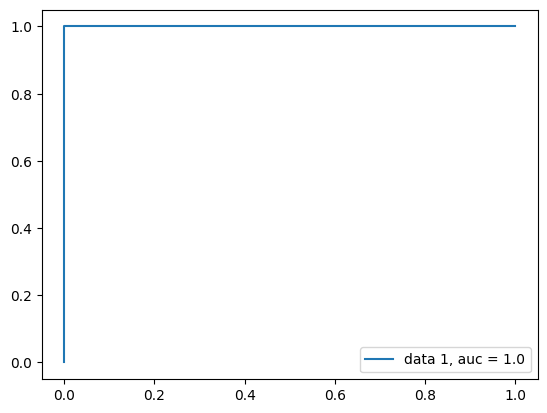

In [92]:
y_pred_proba = y_preds_proba_lr
fpr, tqr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tqr, label = 'data 1, auc = ' + str(auc))
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

### Implementing SVC

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
#defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
             'kernel': ['rbf']}

In [95]:
X = df_fr.drop(['IsDefaulter', 'Payment_Value', 'Dues'], axis = 1)
y = df_fr['IsDefaulter']

In [96]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [98]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [99]:
optimal_SVC_clf = grid_clf.best_estimator_

In [100]:
grid_clf.best_params_

{'C': 100, 'kernel': 'rbf'}

In [101]:
grid_clf.best_score_

0.9964544823494704

In [102]:
#Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [103]:
#Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds, y_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [104]:
test_accuracy_SVC = accuracy_score(test_class_preds, y_test)
test_precision_score_SVC = precision_score(test_class_preds, y_test)
test_recall_score_SVC = recall_score(test_class_preds, y_test)
test_f1_score_SVC = f1_score(test_class_preds, y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.9963037416509954
The precision on test data is  0.9985732814526589
The recall on test data is  0.9940606843124596
The f1 on test data is  0.9963118731802005
The roc_score on test data is  0.9963138231359068


We can see from above results that we are getting around 80% train accuracy and 78% for test accuracy which is not bad. But f1- score is 76% approx, so there might be more ground for improvement.

[[15653     0]
 [    0 15654]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

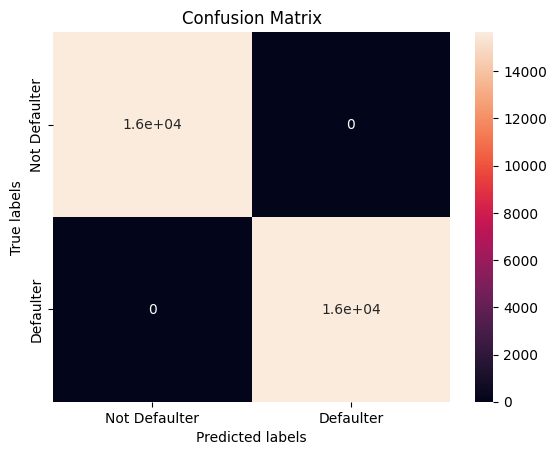

In [105]:
#Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax) #annot = True to annotate cells

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [106]:
import torch

In [107]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"./{model_save_name}"
torch.save(optimal_SVC_clf, path)

In [108]:
model_save_name = 'SVC_optimized_classifier.pt'
path = F"./{model_save_name}"
optimal_SVC_clf = torch.load(path)

In [109]:
optimal_SVC_clf

SVC(C=100, probability=True)

In [110]:
#Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [111]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::, 1]

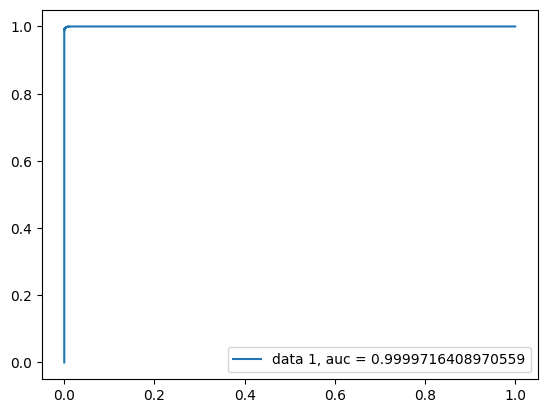

In [112]:
#ROC AUC CURVE
fpr, tqr, _ = roc_curve(y_test, y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr, tqr, label = 'data 1, auc = ' + str(auc))
plt.legend(loc = 4)
plt.show()

### Implementing Decision Tree
Decision Tree is another very popular algorithm for classification problems because it is easy to interpret and understand. An internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome. Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced.

In [113]:
param_grid = {'max_depth': [20, 30, 50, 100], 'min_samples_split': [0.1, 0.2, 0.4]}

In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
X = df_fr.drop(['IsDefaulter', 'Payment_Value', 'Dues'], axis = 1)
y = df_fr['IsDefaulter']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [117]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [118]:
grid_DTC_clf.best_score_

1.0

In [119]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [120]:
#Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [121]:
grid_DTC_clf.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)

In [122]:
#Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds, y_train)
test_accuracy_DTC = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


### Implementing Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
X = df_fr.drop(['IsDefaulter', 'Payment_Value', 'Dues'], axis = 1)
y = df_fr['IsDefaulter']

In [125]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [126]:
#Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [127]:
#Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds, y_train)
test_accuracy_rf = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [128]:
test_accuracy_rf = accuracy_score(test_class_preds, y_test)
test_precision_score_rf = precision_score(test_class_preds, y_test)
test_recall_score_rf = recall_score(test_class_preds, y_test)
test_f1_score_rf = f1_score(test_class_preds, y_test)
test_roc_score_rf = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad.

In [129]:
param_grid = {'n_estimators': [100, 150, 200], 'max_depth': [10, 20, 30]}

In [130]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [131]:
grid_rf_clf.best_score_

1.0

In [132]:
grid_rf_clf.best_params_

{'max_depth': 20, 'n_estimators': 150}

In [133]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [134]:
#Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [135]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds, y_train)
test_accuracy_rf = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [136]:
test_accuracy_rf = accuracy_score(test_class_preds, y_test)
test_precision_score_rf = precision_score(test_class_preds, y_test)
test_recall_score_rf = recall_score(test_class_preds, y_test)
test_f1_score_rf = f1_score(test_class_preds, y_test)
test_roc_score_rf = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on test data is  1.0


In [137]:
len(optimal_rf_clf.feature_importances_)

82

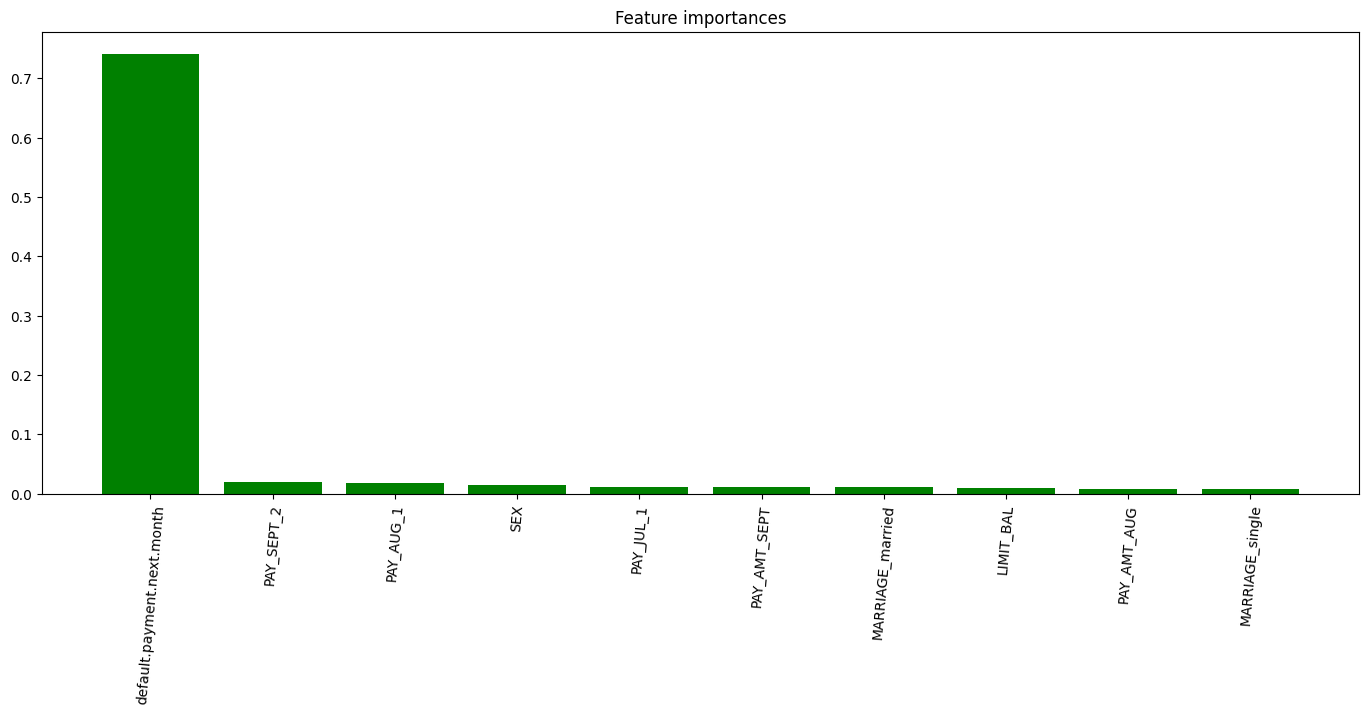

In [138]:
#Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_, 
                                     index = columns, 
                                     columns = ['importance_rf']).sort_values('importance_rf', ascending = False)[:10]
plt.subplots(figsize=(17,6))
plt.title('Feature importances')
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'], 
       color='g', align='center')
plt.xticks(feature_importances_rf.index, rotation=85)
plt.show()

In [139]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"./{model_save_name}"
torch.save(optimal_rf_clf, path)

In [140]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"./{model_save_name}"
optimal_rf_clf = torch.load(path)

In [141]:
#Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [142]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::, 1]

In [143]:
import sklearn.metrics as metrics

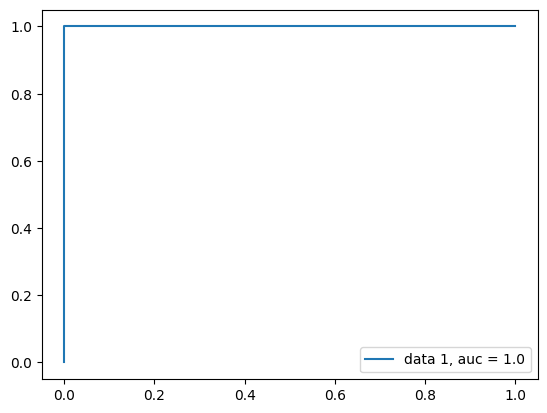

In [144]:
y_pred_proba = y_preds_proba_rf
fpr, tqr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tqr, label = 'data 1, auc = '+str(auc))
plt.legend(loc = 4)
plt.show()

### Implementing XGBoost

In [145]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

### Applying XGBoost

In [146]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [147]:
#Setting parameters for xgboost
parameters = {'max_depth':7, 'eta':1, 'silent':1, 'objective':'binary:logistic', 'eval_metric':'auc','learning_rate':.05}

In [148]:
#training our model
num_round = 50
from datetime import datetime
start = datetime.now()
xg = xgb.train(parameters, dtrain, num_round)
stop = datetime.now()

This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.

In [149]:
#Execution time of the model
execution_time_xgb = stop - start
execution_time_xgb

datetime.timedelta(microseconds=792000)

In [150]:
#now prediction our model on train set
train_class_preds_probs = xg.predict(dtrain)
#now prediction our model on test set
test_class_preds_probs = xg.predict(dtest)

In [151]:
len(train_class_preds_probs)

31307

In [152]:
train_class_preds = []
test_class_preds = []
for i in range(0, len(train_class_preds_probs)):
    if train_class_preds_probs[i] >= 0.5:
        train_class_preds.append(1)
    else:
        train_class_preds.append(0)
        
for i in range(0, len(test_class_preds_probs)):
    if test_class_preds_probs[i] >= 0.5:
        test_class_preds.append(1)
    else:
        test_class_preds.append(0)

In [153]:
test_class_preds_probs[:20]

array([0.04043492, 0.04043492, 0.04043492, 0.04043492, 0.04043492,
       0.04043492, 0.04043492, 0.04043492, 0.9595676 , 0.04043492,
       0.9595676 , 0.04043492, 0.9595676 , 0.04043492, 0.9595676 ,
       0.04043492, 0.9595676 , 0.04043492, 0.9595676 , 0.04043492],
      dtype=float32)

In [154]:
test_class_preds[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [155]:
len(y_train)

31307

In [156]:
len(train_class_preds)

31307

In [157]:
#Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds, y_train)
test_accuracy_xgb = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [158]:
test_accuracy_xgb = accuracy_score(test_class_preds, y_test)
test_precision_xgb = precision_score(test_class_preds, y_test)
test_recall_score_xgb = recall_score(test_class_preds, y_test)
test_f1_score_xgb = f1_score(test_class_preds, y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on train data is  1.0


### Hyperparameter Tuning

In [159]:
from xgboost import XGBClassifier

In [160]:
X = df_fr.drop(['IsDefaulter', 'Payment_Value', 'Dues'], axis=1)
y = df_fr['IsDefaulter']

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [162]:
param_test1 = {
    'max_depth':range(3, 10, 2),
    'min_child_weight':range(1, 6, 2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1, n_estimators = 140, max_depth=5,
                                                 min_child_weight = 1, gamma = 0, subsample = 0.8, colsample_bytree = 0.8,
                                                 objective = 'binary:logistic', nthread=4, scale_pos_weight=1, seed = 27),
                       param_grid = param_test1, scoring = 'accuracy', n_jobs = -1, cv = 3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [163]:
gsearch1.best_score_

1.0

In [164]:
optimal_xgb = gsearch1.best_estimator_

In [165]:
#Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [166]:
#Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds, y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds, y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  1.0
The accuracy on test data is  1.0


In [167]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds, y_test)
test_precision_xgb_tuned = precision_score(test_class_preds, y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds, y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds, y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds, y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  1.0
The precision on test data is  1.0
The recall on test data is  1.0
The f1 on test data is  1.0
The roc_score on train data is  1.0


In [168]:
pd.DataFrame(optimal_xgb.feature_importances_,
            index = columns, 
            columns = ['importance_xgb']).sort_values('importance_xgb', ascending = False)[:10]

,importance_xgb
default.payment.next.month,0.648516
PAY_AUG_2,0.183647
PAY_AUG_1,0.078045
PAY_JUL_1,0.033077
PAY_SEPT_2,0.015346
SEX,0.011506
PAY_JUL_-1,0.008234
MARRIAGE_married,0.007633
PAY_JUN_1,0.003856
PAY_APR_1,0.002878


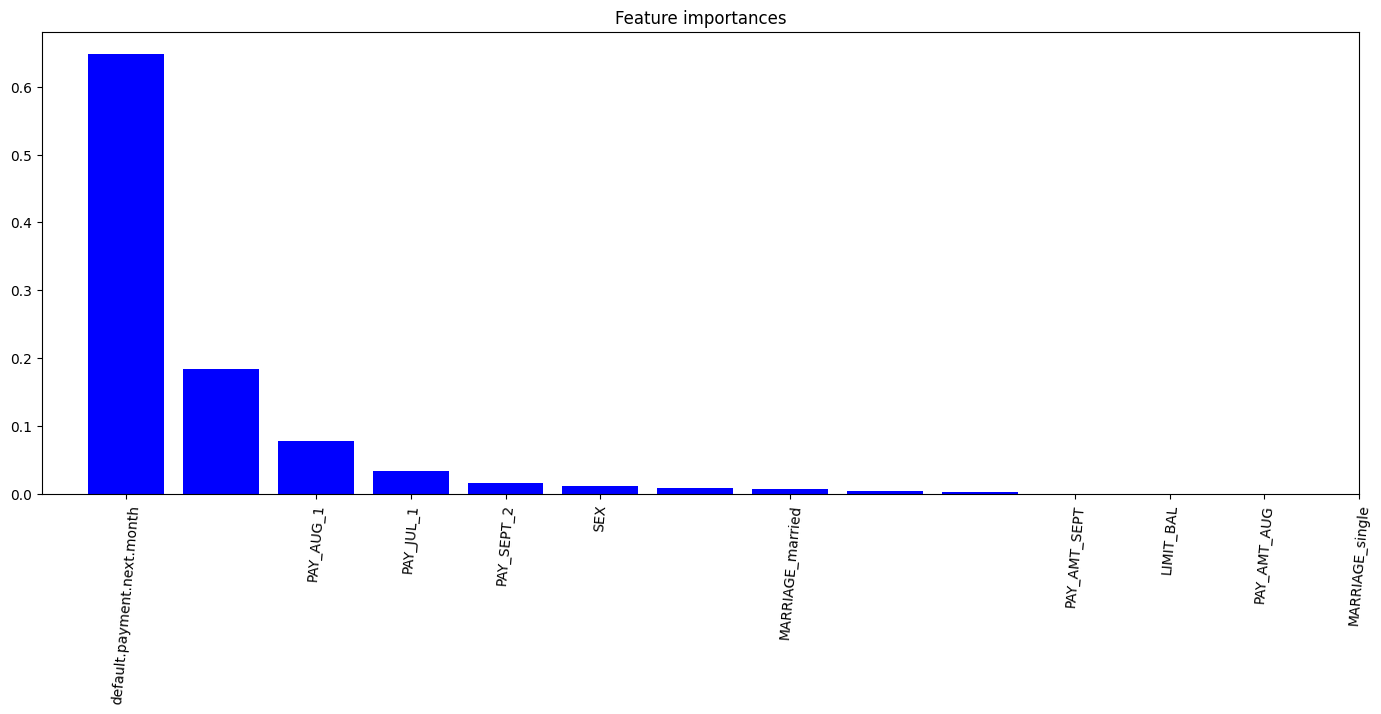

In [170]:
#Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                      index = columns, 
                                      columns = ['importance_xgb']).sort_values('importance_xgb', ascending=False)[:10]
plt.subplots(figsize=(17, 6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
       color = 'b', align = 'center')
plt.xticks(feature_importances_rf.index, rotation = 85)
plt.show()

In [171]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

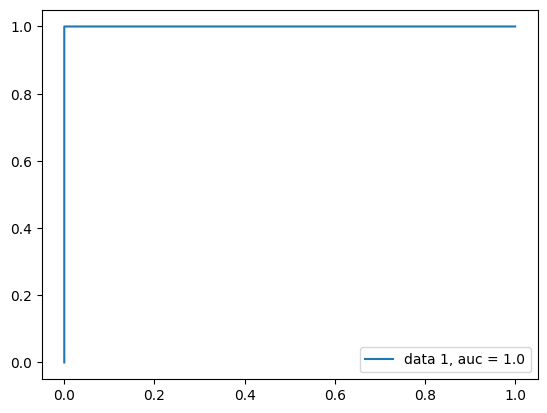

In [172]:
y_pred_proba = y_preds_proba_xgb
fpr, tqr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tqr, label = 'data 1, auc = '+ str(auc))
plt.legend(loc=4)
plt.show()

In [173]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"./{model_save_name}"
torch.save(optimal_xgb, path)

In [174]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"./{model_save_name}"
optimal_xgb = torch.load(path)

### Evaluating the models

In [175]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [176]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [177]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'precision_Score': 
             precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score})

,Classifier,Train Accuracy,Test Accuracy,precision_Score,Recall Score,F1 Score
0,Logistic Regression,1.0,1.000000,1.000000,1.000000,1.000000
1,SVC,1.0,0.996304,0.998573,0.994061,0.996312
2,Random Forest CLf,1.0,1.000000,1.000000,1.000000,1.000000
3,Xgboost Clf,1.0,1.000000,1.000000,1.000000,1.000000


### Plotting ROC AUC for all the models

In [187]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]

In [201]:
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score

# ... (your classifiers_proba definition remains the same)

# Define a result table as an empty DataFrame with columns
result_table = pd.DataFrame(columns=['classiclassifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),
               (optimal_SVC_clf,y_pred_proba_SVC)]fiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
data_to_concat = []

for pair in classifiers_proba:
    fpr, tpr, _ = roc_curve(y_test, pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    try:
        classifier_name = pair[0].__class__.__name__
    except AttributeError:
        classifier_name = str(pair[0])

    # Convert 'fpr' and 'tpr' arrays to lists
    fpr_list = fpr.tolist()
    tpr_list = tpr.tolist()
    
    data_to_concat.append(pd.DataFrame({'classifiers': [classifier_name],
                                        'fpr': [fpr_list],
                                        'tpr': [tpr_list],
                                        'auc': [auc]}))

# Concatenate the list of DataFrames into the result_table
result_table = pd.concat(data_to_concat)

# Set the name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [202]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.37885862516212...",1.000000
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.09675745784695201, 0.09688715953307393...",1.000000
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.00051880674448...",1.000000
SVC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.26705577172503...",0.999972


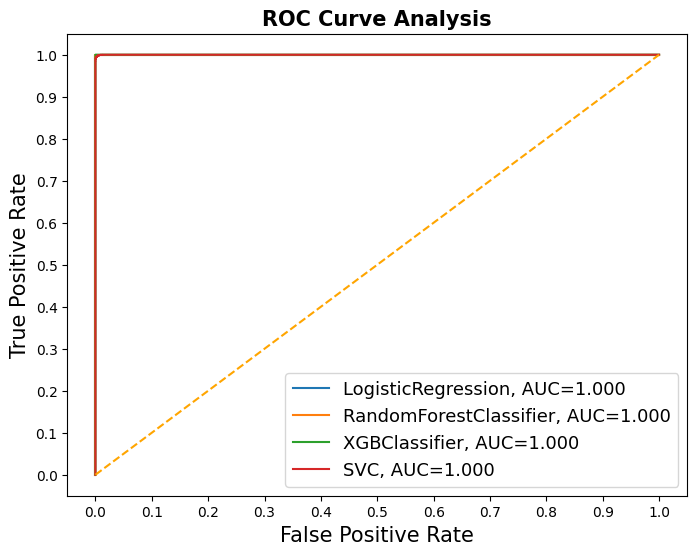

In [203]:
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()